In [21]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import cv2


video_path = "/Users/Tonywfz/Desktop/Desk/Year4/FYP/FYP_repo/Codes/FASTSR/training_data/boat63f_960x540.mp4"
enc_param={}
enc_param["seq_name"] = "boat2s"
enc_param["num_frames"] = 63
enc_param["clip_dim"] = 16
enc_param["QP"] = 27
enc_param["sr_ratio"] = 2
enc_param["main_cfg"] = "encoder_lowdelay_P_main.cfg"
enc_param["seq_cfg"] = "boat63f.cfg"
enc_param["w"] = 960
enc_param["h"] = 540
yuv_name = "boat2s_960x540.yuv"


In [3]:
import numpy as np

In [4]:
to_yuv_cmd = 'ffmpeg -i  {} {}'.format(video_path, yuv_name)

In [6]:
to_yuv_cmd
os.system(to_yuv_cmd)

0

In [ ]:
def load_rgb_from_yuv(yuvpath,param):
    rgb_arr = np.zeros((param["num_frames"],param["w"],param["h"],3))
    for i in range(0,param["num_frames"]):
        rgb_arr[i,:,:,:] = loadYuv(yuvpath,)
    

In [ ]:
rgb_frames = load_rgb_from_yuv("training_data/boat63f_960x540.yuv")

In [ ]:
cfg_file1 = "/Users/Tonywfz/Desktop/Desk/Year4/FYP/FYP_repo/Codes/FASTSR/utils/hm/cfg/{}".format(enc_param["main_cfg"])
cfg_file2 = "/Users/Tonywfz/Desktop/Desk/Year4/FYP/FYP_repo/Codes/FASTSR/utils/hm/cfg/per-sequence/{}".format(enc_param["seq_cfg"])


In [5]:
def img_downsample(hr_images,ratio):
    (n_frames,h,w,c) = hr_images.shape
    assert (int(h/ratio)*ratio == h),"Frame size not appropriate"
    assert (int(w/ratio) * ratio == w), "Frame size not appropriate"
    lr_frames= np.zeros((n_frames,int(h/ratio),int(w/ratio),c),dtype=np.uint8)
    for i in range(n_frames):
        lr_frames[i] =  cv2.resize(hr_images[i], dsize=(int(w/ratio), int(h/ratio)), interpolation=cv2.INTER_LINEAR)
    return lr_frames

def crop_hr(filename,enc_param):
    vidcap = cv2.VideoCapture(filename)
    total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    print("Frames: {}".format(total_frames))
    expected_w_for_hr = enc_param["w"] - enc_param["w"] % (enc_param["clip_dim"] * enc_param["sr_ratio"])
    expected_h_for_hr = enc_param["h"] - enc_param["h"] % (enc_param["clip_dim"] * enc_param["sr_ratio"])
    rgb_arr =  np.zeros((total_frames,expected_h_for_hr,expected_w_for_hr,3),dtype=np.uint8)# setting dtype is quite important
    print("Original size: {}x{}, now: {}x{}".format( enc_param["w"], enc_param["h"],expected_w_for_hr,expected_h_for_hr))
    for i in range(total_frames):
        success, hr = vidcap.read()
        hr = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)  # plt. cv2 reads images as BGR by default, where as plt uses RGB format. So your Blue and Red color will get flipped. 
        rgb_arr[i] = hr[0:expected_h_for_hr,0:expected_w_for_hr]
        assert np.array_equal(rgb_arr[i],hr[0:expected_h_for_hr,0:expected_w_for_hr]), "copy failed"
    return rgb_arr



In [6]:
hr = crop_hr(video_path, enc_param) # crop the HR video
lr = img_downsample(hr,enc_param["sr_ratio"])


Frames: 63
Original size: 960x540, now: 960x512


In [10]:
cv2.__version__
#plt.imshow(hr[0])

'4.0.0'

In [11]:
yuv = cv2.cvtColor(lr[0],cv2.COLOR_RGB2YUV)

In [19]:
yuv420 = cv2.cvtColor(lr[0],cv2.COLOR_RGB2YUV_I420)

In [20]:
yuv420.shape

(384, 480)

In [13]:
lr[0].shape

(256, 480, 3)

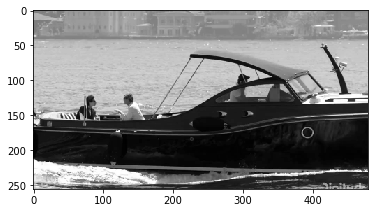

In [18]:
plt.imshow(yuv[:,:,0],cmap="gray")

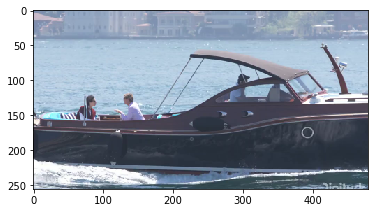

In [9]:
plt.imshow(lr[0])

In [67]:
vidcap = cv2.VideoCapture(filename)
suc,hr = vidcap.read()

In [68]:
type(hr)

numpy.ndarray

In [69]:
hr.shape

(540, 960, 3)

In [58]:
rgb = 2*image[0:512,0:960]

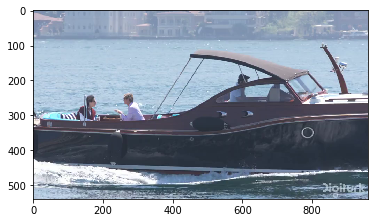

In [56]:
image
pylab.imshow(image)

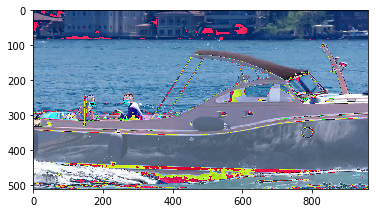

In [59]:
type(rgb)
rgb
pylab.imshow(rgb)

In [60]:
rgb

Image([[[246,  24,  86],
        [248,  26,  88],
        [254,  32,  94],
        ...,
        [ 20,  46, 106],
        [ 20,  46, 106],
        [ 20,  46, 106]],

       [[244,  22,  84],
        [246,  24,  86],
        [248,  26,  88],
        ...,
        [ 20,  46, 106],
        [ 20,  46, 106],
        [ 20,  46, 106]],

       [[248,  26,  88],
        [252,  30,  92],
        [252,  30,  92],
        ...,
        [ 20,  46, 106],
        [ 20,  46, 106],
        [ 20,  46, 106]],

       ...,

       [[ 94, 108, 132],
        [106, 120, 144],
        [132, 146, 170],
        ...,
        [244,  34,  84],
        [ 10,  56, 106],
        [ 30,  76, 126]],

       [[108, 128, 160],
        [112, 132, 164],
        [124, 144, 176],
        ...,
        [164, 204, 252],
        [186, 226,  18],
        [206, 246,  38]],

       [[110, 130, 162],
        [112, 132, 164],
        [116, 136, 168],
        ...,
        [108, 148, 196],
        [110, 150, 198],
        [112, 152, 200]]

(512, 960, 3)


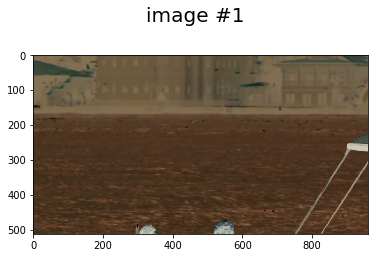

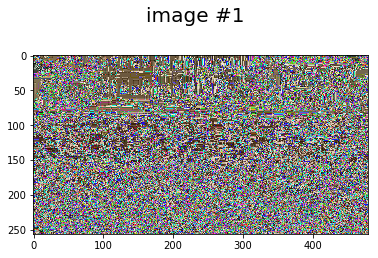

In [20]:
image_hr = rgb_hr[0]
print(image_hr.shape)
image_lr = rgb_lr[0]
fig = pylab.figure()
fig.suptitle('image #{}'.format(num), fontsize=20)
pylab.imshow(image_hr)
fig = pylab.figure()
fig.suptitle('image #{}'.format(num), fontsize=20)
pylab.imshow(image_lr)
pylab.show()

(540, 960, 3)
(540, 960, 3)


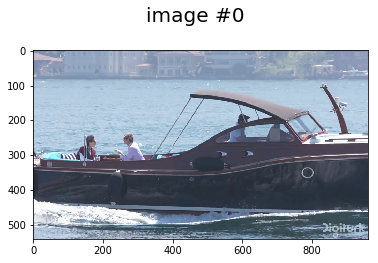

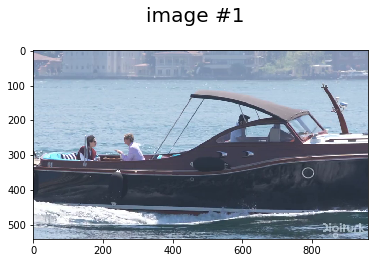

In [9]:
import pylab
import imageio
filename = 'training_data/boat63f_960x540.mp4'
vid = imageio.get_reader(filename,  'ffmpeg')
nums = range(0,2)
for num in nums:
    image = vid.get_data(num)
    fig = pylab.figure()
    fig.suptitle('image #{}'.format(num), fontsize=20)
    pylab.imshow(image)
    print(image.shape)
pylab.show()

In [58]:
def make_video( rgb_frames, outname="rgb_raw", fps=30, size=None): # save rgb frames to mp4 video and YUV file
    num_frames,h,w,c = rgb_frames.shape
   # bgr_frames = cv2.cvtColor(rgb_frames, cv2.COLOR_RGB2BGR)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('{}.mp4'.format(outname),fourcc, 1.0*fps, (w,h))
    for i in range(num_frames):
        out.write(cv2.cvtColor(rgb_frames[i],cv2.COLOR_RGB2BGR))
    out.release()
    yuv_path = "lr.yuv"
    #generated mp4 file and convert it to 420YUV
    command = "ffmpeg -i {}.mp4 -pix_fmt yuv420p {}".format(outname,yuv_path)
    os.system(command)
    return os.path.abspath(yuv_path)

In [59]:
make_video(lr)

'/Users/Tonywfz/Desktop/Desk/Year4/FYP/FYP_repo/Codes/FASTSR/lr.yuv'

In [26]:
import os
import subprocess as sp

In [60]:
a = [1,2,3,4]
a[1:]

[2, 3, 4]

In [62]:
len(a);

In [64]:
list(range(1,5))

[1, 2, 3, 4]

In [ ]:
# prepare to train on the HD video frame by frame
#1. prepare dataset class that can get video name as in input of __init__ and can choose different sampling rate
vidcap = cv2.VideoCapture("/Users/Tonywfz/Desktop/Desk/Year4/FYP/FYP_repo/Codes/FASTSR/training_data/boat63f_960x540.mp4")
total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
tqdm_train = tqdm(range(total_frames),ncols=80)
patches_per_frame = 16 # as a batch
for _ in tqdm_test:
    suc, hr = vidcap.read()
    if not suc: break
    
    hr_patches = feature_extraction.image.extract_patches_2d(hr,(96,96),patches_per_frame)
    
    
        #randomly sample 10 blocks of 192*192 using extract_patches_2d


In [85]:
test_arr = np.random.randint(1,9,size=(5,5,3) )

In [76]:
test_arr

array([[[7, 2, 6],
        [5, 4, 1],
        [4, 7, 3]],

       [[8, 4, 2],
        [2, 3, 1],
        [8, 4, 4]],

       [[6, 4, 3],
        [5, 1, 3],
        [6, 8, 3]]])

In [86]:
test_arr.shape

(5, 5, 3)

In [81]:
from sklearn import  feature_extraction

In [127]:
import torch.nn as nn
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

def my_conv(in_channels,out_channels,kernel_size,bias=True):
    return nn.Conv2d(in_channels,out_channels,kernel_size,padding=(kernel_size//2),bias=bias)

class MeanShift(nn.Conv2d):
    def __init__(
        self, rgb_range,
        rgb_mean=(0.4488, 0.4371, 0.4040), rgb_std=(1.0, 1.0, 1.0), sign=-1):

        super(MeanShift, self).__init__(3, 3, kernel_size=1)
        std = torch.Tensor(rgb_std)
        self.weight.data = torch.eye(3).view(3, 3, 1, 1) / std.view(3, 1, 1, 1)
        self.bias.data = sign * rgb_range * torch.Tensor(rgb_mean) / std
        for p in self.parameters():
            p.requires_grad = False

class ResBlock(nn.Module):
    def __init__(
        self, conv, n_feats, kernel_size,
        bias=True, bn=False, act=nn.ReLU(True), res_scale=1):

        super(ResBlock, self).__init__()
        m = []
        for i in range(2):
            m.append(conv(n_feats, n_feats, kernel_size, bias=bias))
            if bn:
                m.append(nn.BatchNorm2d(n_feats))
            if i == 0:
                m.append(act)

        self.body = nn.Sequential(*m)
        self.res_scale = res_scale

    def forward(self, x):
        res = self.body(x).mul(self.res_scale)
        res += x

        return res

class Upsampler(nn.Sequential):
    def __init__(self, conv, scale, n_feats, bn=False, act=False, bias=True):

        m = []
        if (scale & (scale - 1)) == 0:    # Is scale = 2^n?
            for _ in range(int(math.log(scale, 2))):
                m.append(conv(n_feats, 4 * n_feats, 3, bias))
                m.append(nn.PixelShuffle(2))
                if bn:
                    m.append(nn.BatchNorm2d(n_feats))
                if act == 'relu':
                    m.append(nn.ReLU(True))
                elif act == 'prelu':
                    m.append(nn.PReLU(n_feats))

        elif scale == 3:
            m.append(conv(n_feats, 9 * n_feats, 3, bias))
            m.append(nn.PixelShuffle(3))
            if bn:
                m.append(nn.BatchNorm2d(n_feats))
            if act == 'relu':
                m.append(nn.ReLU(True))
            elif act == 'prelu':
                m.append(nn.PReLU(n_feats))
        else:
            raise NotImplementedError

        super(Upsampler, self).__init__(*m)


class MDSR(nn.Module):
    def __init__(self, args, conv=my_conv):
        super(MDSR, self).__init__()
        n_resblocks = args.n_resblocks
        n_feats = args.n_feats
        kernel_size = 3
        act = nn.ReLU(True)
        self.sr_ratio = args.sr_ratio
       # self.url = url['r{}f{}'.format(n_resblocks, n_feats)] change to the
        self.sub_mean = MeanShift(args.rgb_range)
        self.add_mean = MeanShift(args.rgb_range, sign=1)

        m_head = [conv(args.n_colors, n_feats, kernel_size)]

        self.pre_process = nn.Sequential(ResBlock(conv, n_feats, 5, act=act),ResBlock(conv, n_feats, 5, act=act))

        m_body = [
            ResBlock(
                conv, n_feats, kernel_size, act=act
            ) for _ in range(n_resblocks)
        ]
        m_body.append(conv(n_feats, n_feats, kernel_size))

        self.upsample = Upsampler(conv, self.sr_ratio, n_feats, act=False)

        m_tail = [conv(n_feats, args.n_colors, kernel_size)]

        self.head = nn.Sequential(*m_head)
        self.body = nn.Sequential(*m_body)
        self.tail = nn.Sequential(*m_tail)

    def forward(self, x):
        x = self.sub_mean(x)
        x = self.head(x)
        x = self.pre_process(x)

        res = self.body(x)
        res += x

        x = self.upsample(res)
        x = self.tail(x)
        x = self.add_mean(x)

        return x

    def set_scale(self, sr_ratio):
        self.sr_ratio = sr_ratio


In [87]:
def train_on_video(vid,gpu=False,args): # temporary naming for this
    '''
    Train a neural network based on the input HR video
    '''
    sr_model = MDSR(args)
    loss = nn.L1Loss()
    optimizer = optim.Adam(sr_model.parameters(),lr = 1e-4,betas=(0.9,0.999),eps = 1e-8) # now we don't have weight decay
    device = None
    if(gpu):
        device = "cuda:0"
        sr_model.to(device)
    loss = nn.L1Loss()
    optimizer = optim.
    vidcap = cv2.VideoCapture(vid)
    total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []
    for i in range(total_frames):
        suc,hr = vidcap.read()
        if not suc: 
            break
        hr = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)
        frames.append(hr)
#    tqdm_train = tqdm(range(total_frames), ncols=80)
    patches_per_frame = 16  # as a batch
    epoch = 300
    for epo in range(epoch):
        running_loss=  0.0
        for i in range(len(frames)):

            hr = frames[i]
            hr_patches = feature_extraction.image.extract_patches_2d(hr, (96, 96), patches_per_frame)
            lr_patches = np2Tensor(img_downsample(hr_patches,2))
            hr_patches = np2Tensor(hr_patches)
            if(gpu):
                lr_patches.to(device)
                hr_patches.to(device)
            optimizer.zero_grad()
            outputs = sr_model(lr_patches)
            cur_loss = loss(outputs,hr_patches)
            cur_loss.backward()
            optimizer.step()

            running_loss += cur_loss.item()
            if(i%20 == 19):
                print('[%d, %5d] loss: %.3f' %(epo + 1, i + 1, running_loss / 20))
                running_loss = 0.0
    print("Finished Training")
        #save model
    save_path = "{}_r{}_f{}.pt".format(os.path.basename(vid),args.n_resblocks,args.n_feats) # contain the 
    torch.save(sr_model.state_dict(),save_path)


In [125]:
def np2Tensor(np_arr, rgb_range=255):
    np_transpose = np_arr.transpose((0,3,1,2))
    tensor = torch.from_numpy(np_transpose).float()
    tensor.mul_(rgb_range / 255)
    return tensor

In [92]:
class arg():
    def __init__(self):
        self.n_resblocks = None
        self.n_feats = None
        self.sr_ratio = None
        self.n_colors = None
        self.rgb_range = None
args = arg()
args.n_resblocks = 2
args.n_feats = 32
args.sr_ratio = 2
args.n_colors = 3
args.rgb_range = 255

In [128]:
sr_model = MDSR(args)

In [129]:
loss = nn.L1Loss()

In [130]:
optimizer = optim.Adam(sr_model.parameters(),lr = 1e-4,betas=(0.9,0.999),eps = 1e-8) # now we don't have weight decay

In [99]:
vidcap = cv2.VideoCapture(video_path)
total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
#tqdm_train = tqdm(range(total_frames), ncols=80)
patches_per_frame = 16  # as a batch
epoch = 10


In [100]:
from tqdm import tqdm
tqdm_train = tqdm(range(total_frames), ncols=80)

  0%|                                                    | 0/63 [00:00<?, ?it/s]

In [131]:
for epo in range(epoch):
    running_loss=  0.0
    vidcap = cv2.VideoCapture(video_path)
    total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    for i in range(int(total_frames/2)):
        suc, hr = vidcap.read()
        if not suc: break
        
        hr = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)
        hr_patches = feature_extraction.image.extract_patches_2d(hr, (96, 96), patches_per_frame)
        lr_patches = np2Tensor(img_downsample(hr_patches,2))
        hr_patches = np2Tensor(hr_patches)
        
        optimizer.zero_grad()
        outputs = sr_model(lr_patches)
        cur_loss = loss(outputs,hr_patches)
        cur_loss.backward()
        optimizer.step()
        
        running_loss += cur_loss.item()
        if(i%5 == 4):
            print('[%d, %5d] loss: %.3f' %(epo + 1, i + 1, running_loss / 5))
            running_loss = 0.0
print("Finished Training")
        


[1,     5] loss: 57.523
[1,    10] loss: 35.725
[1,    15] loss: 25.833
[1,    20] loss: 18.398
[1,    25] loss: 17.949
[1,    30] loss: 14.902


KeyboardInterrupt: 

In [104]:
suc, hr = vidcap.read()

In [106]:
hr_patches = feature_extraction.image.extract_patches_2d(hr, (96, 96), patches_per_frame)

In [108]:
hr_patches.shape
lr = img_downsample(hr_patches,2)

In [109]:
lr.shape

(16, 48, 48, 3)

In [118]:
print(lr[1].shape)

(48, 48, 3)
